In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
test_images.shape

(10000, 28, 28)

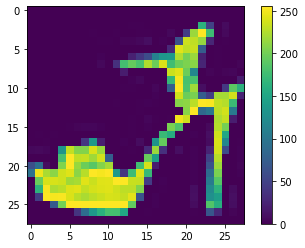

In [10]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [40]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [41]:
train_labels[0]

9

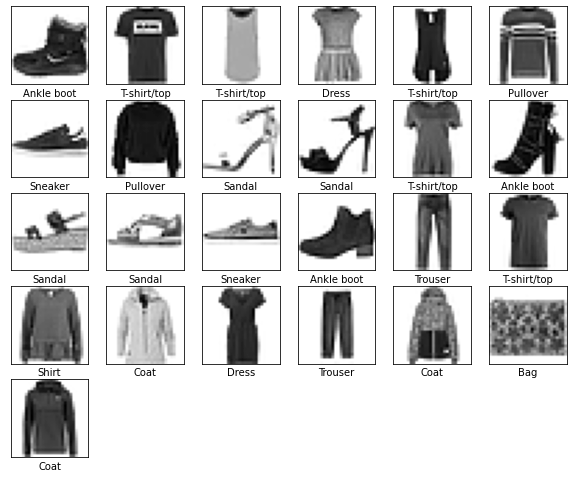

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4954 - accuracy: 0.8256
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3757 - accuracy: 0.8643
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3355 - accuracy: 0.8775
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3136 - accuracy: 0.8847
Epoch 5/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2949 - accuracy: 0.8915


In [50]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.3583 - accuracy: 0.8678

테스트 정확도: 0.8678
